In [35]:

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)

In [36]:

import pandas as pd
from plotnine import *

%matplotlib inline

In [37]:
shop = pd.read_csv('14.세종시_상권정보.csv')
shop.shape

(10773, 13)

In [38]:
shop.head()

,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,lon,lat
0,D,소매,D21,철물/난방/건설자재소매,D21A06,철물/건설자재소매,G47511,철물 및 난방용구 소매업,3611025000,조치원읍,"세종특별자치시 조치원읍 새내로 90-1, (정리)",127.298552,36.599920
1,D,소매,D21,철물/난방/건설자재소매,D21A02,보일러/냉난방용품,G47511,철물 및 난방용구 소매업,3611037000,전의면,"세종특별자치시 전의면 왕의물로 40, (동교리)",127.204298,36.682526
2,F,생활서비스,F15,주택수리,F15A03,배관난방보일러,F42201,배관 및 냉·난방 공사업,3611036000,연서면,"세종특별자치시 연서면 당산로 322, (봉암리)",127.280990,36.560523
3,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,분식 및 김밥 전문점,3611034000,금남면,"세종특별자치시 금남면 채나무길 61-3, (국곡리)",127.270561,36.426637
4,D,소매,D11,유아용품,D11A03,유아용품판매,G47599,그외 기타 분류안된 가정용품 소매업,3611025000,조치원읍,"세종특별자치시 조치원읍 충현로 159, (침산리, 욱일2차)",127.294177,36.602922


In [39]:
shop.tail()

,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,lon,lat
10768,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,자동차 타이어 및 튜브 판매업,3611025000,조치원읍,"세종특별자치시 조치원읍 충현로 48-11, (죽림리)",127.299415,36.593481
10769,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,부동산 자문 및 중개업,3611034000,금남면,"세종특별자치시 금남면 금남구즉로 529, (대박리)",127.333858,36.480396
10770,Q,음식,Q06,양식,Q06A02,돈가스전문점,I56114,서양식 음식점업,3611055000,고운동,"세종특별자치시 만남로 13, (고운동)",127.235897,36.500933
10771,N,관광/여가/오락,N02,무도/유흥/가무,N02A01,노래방,R91223,노래연습장 운영업,3611056000,보람동,"세종특별자치시 호려울로 51, (보람동)",127.289353,36.477949
10772,R,학문/교육,R05,학원-음악미술무용,R05A02,피아노/바이올린/기타,P85620,예술 학원,3611054000,종촌동,"세종특별자치시 도움3로 160, (종촌동, 가재마을센트레빌4단지)",127.243716,36.506156


In [40]:
shop['상권업종대분류명'].value_counts()

음식          4342
소매          3003
생활서비스       1587
부동산          783
학문/교육        754
관광/여가/오락     200
숙박            74
스포츠           30
Name: 상권업종대분류명, dtype: int64

In [41]:
shop['상권업종중분류명'].value_counts()

한식          1729
종합소매점        892
이/미용/건강      783
부동산중개        753
커피점/카페       497
            ... 
스포츠/운동         2
평가/개발/관리       2
실외운동시설         2
종교용품판매         2
호텔/콘도          1
Name: 상권업종중분류명, Length: 85, dtype: int64

In [42]:
shop.columns

Index(['상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명', '상권업종소분류코드',
       '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '행정동코드', '행정동명', '도로명주소', 'lon',
       'lat'],
      dtype='object')

In [43]:

view_columns = ['상권업종대분류명', '상권업종중분류명',
              '상권업종소분류명', '행정동명', '도로명주소', 'lon', 'lat']
shop[view_columns].head()

,상권업종대분류명,상권업종중분류명,상권업종소분류명,행정동명,도로명주소,lon,lat
0,소매,철물/난방/건설자재소매,철물/건설자재소매,조치원읍,"세종특별자치시 조치원읍 새내로 90-1, (정리)",127.298552,36.599920
1,소매,철물/난방/건설자재소매,보일러/냉난방용품,전의면,"세종특별자치시 전의면 왕의물로 40, (동교리)",127.204298,36.682526
2,생활서비스,주택수리,배관난방보일러,연서면,"세종특별자치시 연서면 당산로 322, (봉암리)",127.280990,36.560523
3,음식,분식,라면김밥분식,금남면,"세종특별자치시 금남면 채나무길 61-3, (국곡리)",127.270561,36.426637
4,소매,유아용품,유아용품판매,조치원읍,"세종특별자치시 조치원읍 충현로 159, (침산리, 욱일2차)",127.294177,36.602922


In [44]:
shop.isnull().sum()

상권업종대분류코드      0
상권업종대분류명       0
상권업종중분류코드      0
상권업종중분류명       0
상권업종소분류코드      0
상권업종소분류명       0
표준산업분류코드     604
표준산업분류명      604
행정동코드          0
행정동명           0
도로명주소          0
lon            0
lat            0
dtype: int64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실습환경에 맞는 한글폰트 설정을 해주세요.
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='NanumGothic')

<AxesSubplot:>

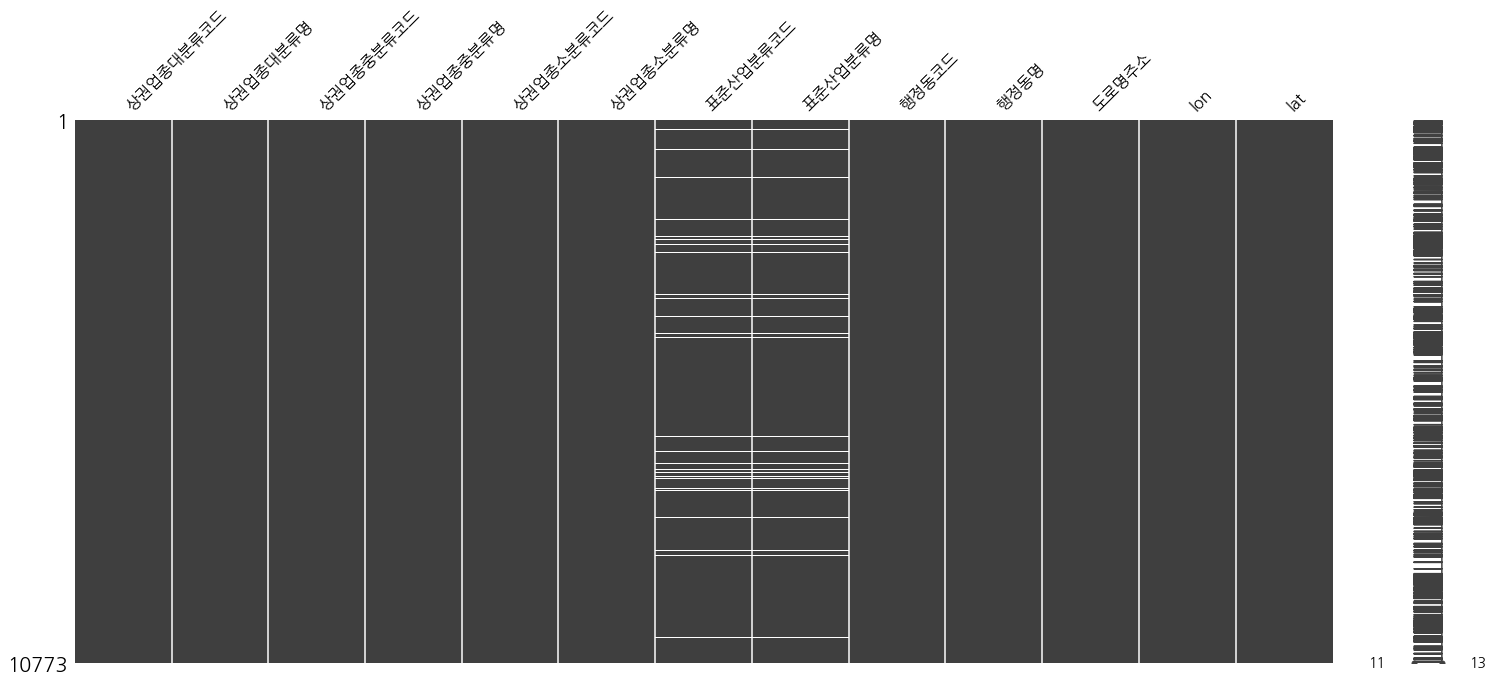

In [46]:

import missingno as msno

msno.matrix(shop)

<AxesSubplot:xlabel='lon', ylabel='lat'>

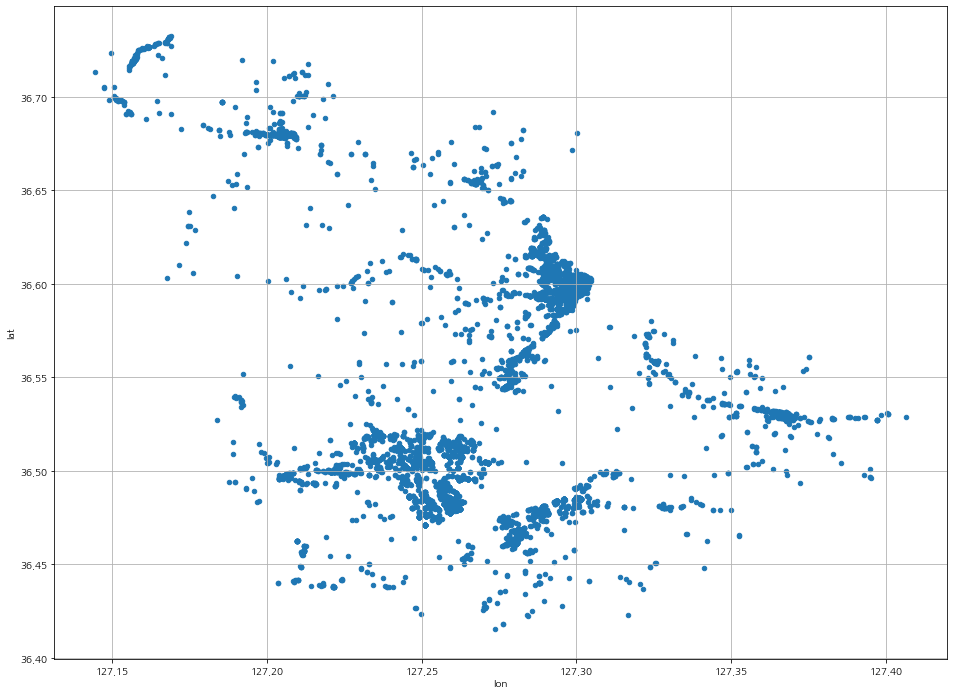

In [47]:

# Pandas 의 plot 으로 위도와 경도를 산점도로 그려봅니다.
shop.plot.scatter(x='lon', y='lat', figsize=(16, 12), grid=True)

In [48]:
shop['도로명주소'].head()

0          세종특별자치시 조치원읍 새내로 90-1, (정리)
1           세종특별자치시 전의면 왕의물로 40, (동교리)
2           세종특별자치시 연서면 당산로 322, (봉암리)
3         세종특별자치시 금남면 채나무길 61-3, (국곡리)
4    세종특별자치시 조치원읍 충현로 159, (침산리, 욱일2차)
Name: 도로명주소, dtype: object

<AxesSubplot:xlabel='lon', ylabel='lat'>

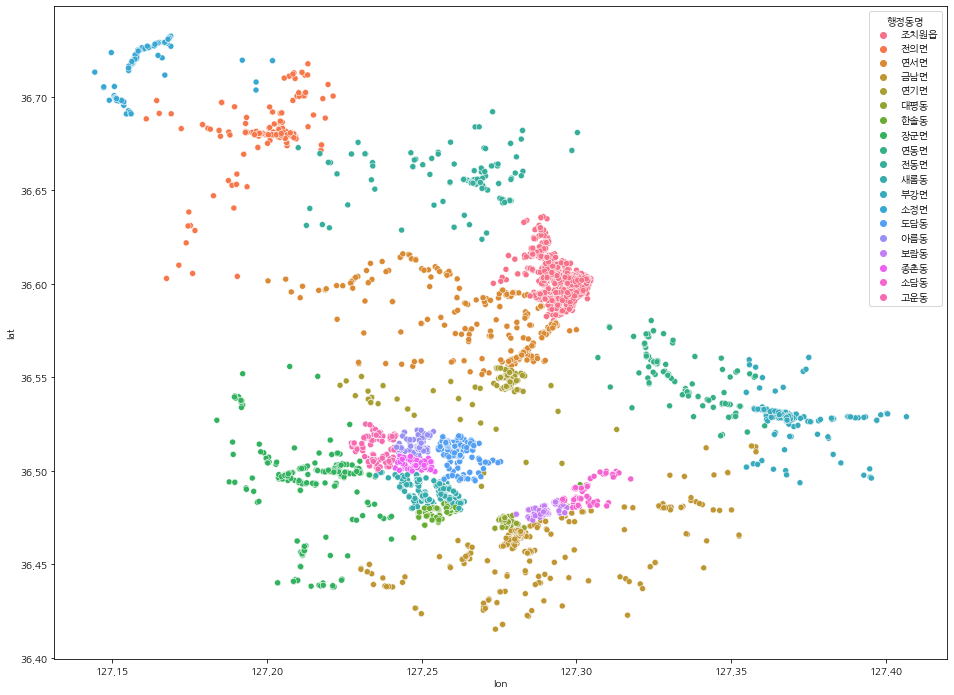

In [50]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop, x='lon', y='lat', hue='행정동명')

In [51]:
shop['상권업종대분류명'].value_counts()

음식          4342
소매          3003
생활서비스       1587
부동산          783
학문/교육        754
관광/여가/오락     200
숙박            74
스포츠           30
Name: 상권업종대분류명, dtype: int64

<AxesSubplot:xlabel='lon', ylabel='lat'>

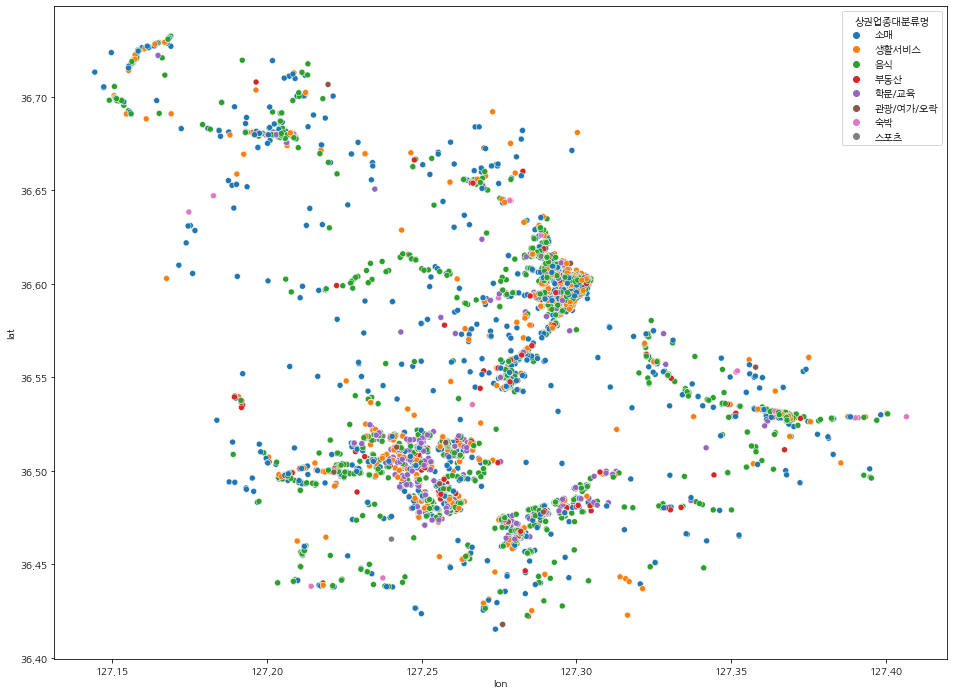

In [52]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop, x='lon', y='lat', hue='상권업종대분류명')

In [56]:
shop_edu = shop[shop['상권업종대분류명'] == '학문/교육']

<AxesSubplot:xlabel='lon', ylabel='lat'>

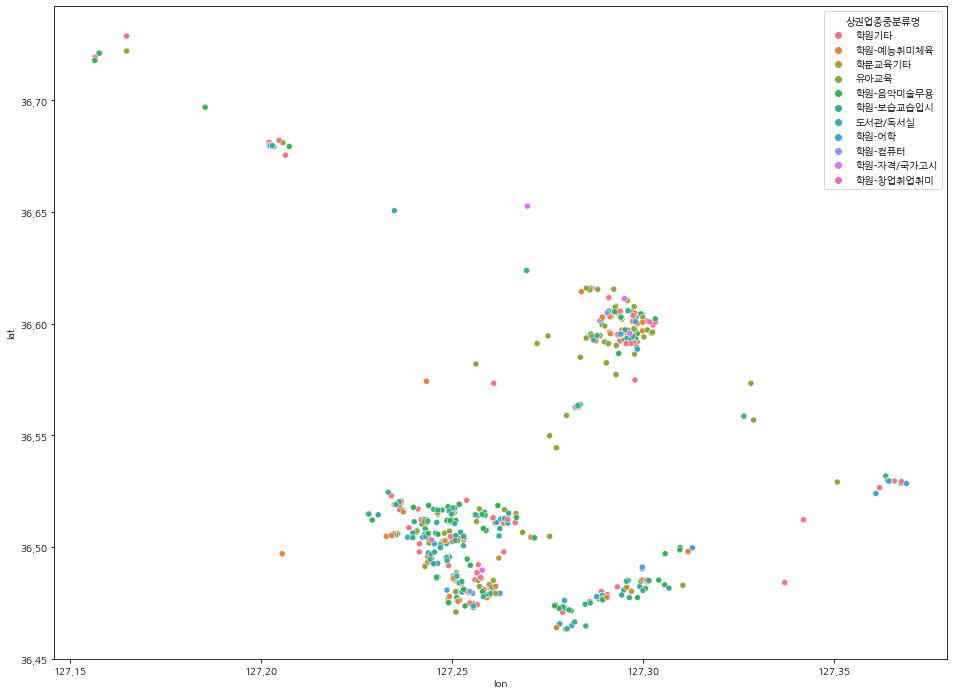

In [57]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_edu, x='lon', y='lat', hue='상권업종중분류명')

In [58]:
shop_ent = shop[shop['상권업종대분류명'] == '관광/여가/오락']

<AxesSubplot:xlabel='lon', ylabel='lat'>

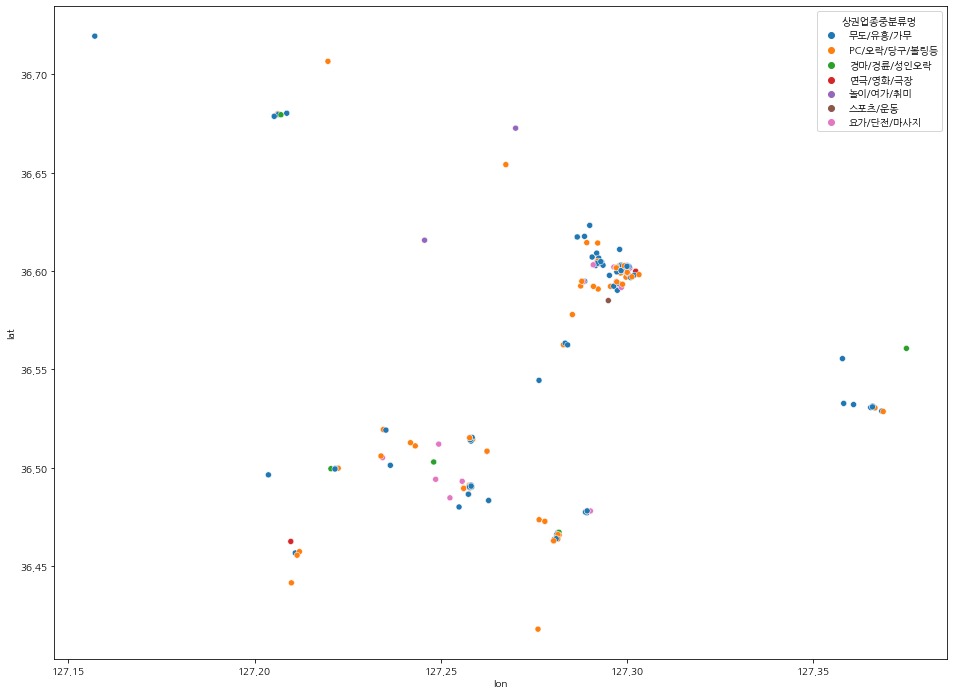

In [59]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_ent, x='lon', y='lat', hue='상권업종중분류명')

In [60]:
shop_realty = shop[shop['상권업종대분류명'] == '부동산']

<AxesSubplot:xlabel='lon', ylabel='lat'>

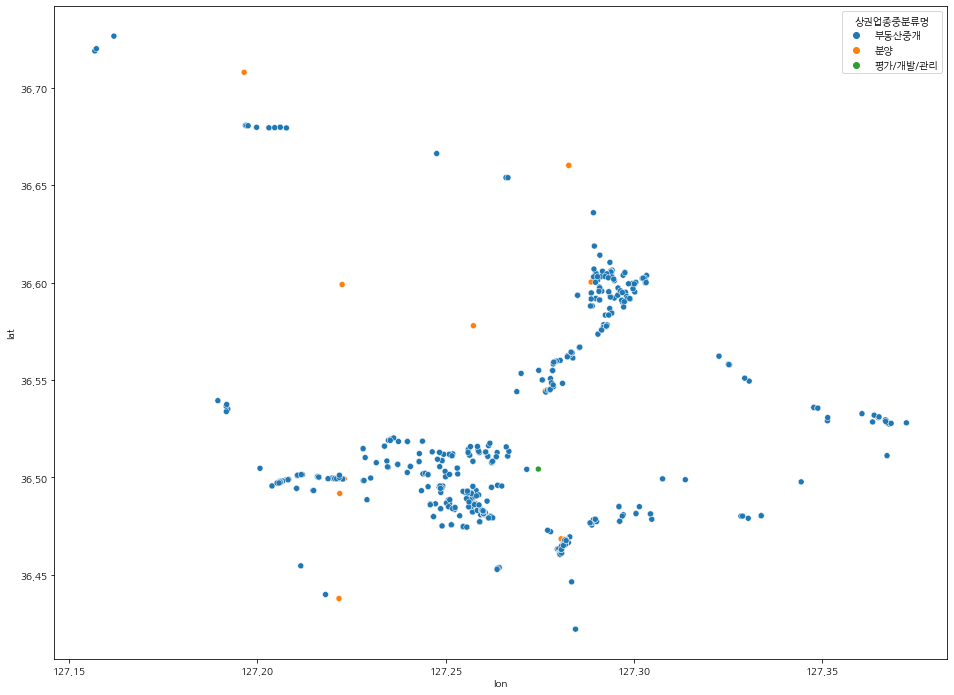

In [61]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_realty, x='lon', y='lat', hue='상권업종중분류명')

In [62]:
shop_cafe = shop[shop['상권업종중분류명'] == '커피점/카페']

<AxesSubplot:xlabel='lon', ylabel='lat'>

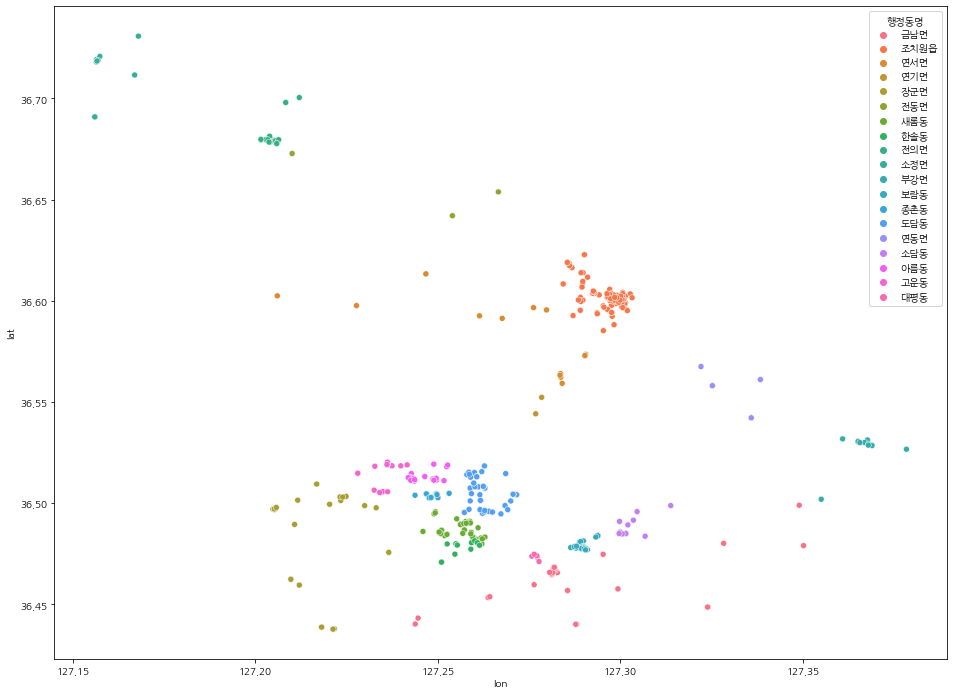

In [63]:
plt.figure(figsize=(16, 12))
sns.scatterplot(data=shop_cafe, x='lon', y='lat', hue='행정동명', 
                alpha='auto')